In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
gdf = pd.read_csv("german_credit.csv")
gdf.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [3]:
# Dimension of the data and Dimension of the dataframe
print("Dimension of data:", gdf.shape)


print("Dimension of dataframe:", gdf.ndim)

Dimension of data: (1000, 21)
Dimension of dataframe: 2


In [5]:
gdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
default                       1000 non-null int64
account_check_status          1000 non-null object
duration_in_month             1000 non-null int64
credit_history                1000 non-null object
purpose                       1000 non-null object
credit_amount                 1000 non-null int64
savings                       1000 non-null object
present_emp_since             1000 non-null object
installment_as_income_perc    1000 non-null int64
personal_status_sex           1000 non-null object
other_debtors                 1000 non-null object
present_res_since             1000 non-null int64
property                      1000 non-null object
age                           1000 non-null int64
other_installment_plans       1000 non-null object
housing                       1000 non-null object
credits_this_bank             1000 non-null int64
job                           1000

In [9]:
print("Columns of dataframe:")
print(gdf.columns)

Columns of dataframe:
Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')


### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [12]:
# Lets build a Ensemble model but need to modify the dataset first

In [10]:
from sklearn.model_selection import train_test_split
gdf_h1, gdf_h2 = train_test_split(gdf, test_size=0.5, random_state = 101)

In [17]:
gdf_h1.shape

(500, 21)

### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [14]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
gcredit = pd.get_dummies(gdf_h1, columns=['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'])

In [15]:
#we drop the column 'default'
gmodel = gcredit.drop(['default'], axis = 1)

In [18]:
# Print Shape of model data
gmodel.shape

(500, 61)

### Check for highly correlated variables but don't required any treatment for this use case

In [19]:
gcredit.corr().transpose()

,default,duration_in_month,credit_amount,installment_as_income_perc,present_res_since,age,credits_this_bank,people_under_maintenance,account_check_status_0 <= ... < 200 DM,account_check_status_< 0 DM,...,housing_own,housing_rent,job_management/ self-employed/ highly qualified employee/ officer,job_skilled employee / official,job_unemployed/ unskilled - non-resident,job_unskilled - resident,telephone_none,"telephone_yes, registered under the customers name",foreign_worker_no,foreign_worker_yes
default,1.000000,0.223669,0.100665,0.107718,0.001447,-0.104182,-0.046802,-0.027276,0.139990,0.239409,...,-0.103211,0.112749,0.043095,-3.098220e-02,-0.024137,0.009251,0.068472,-0.068472,-0.076630,0.076630
duration_in_month,0.223669,1.000000,0.622670,0.096635,-0.039605,-0.060186,-0.025304,-0.012285,0.162021,0.007594,...,-0.027878,-0.051602,0.129092,4.176750e-02,-0.021538,-0.150506,-0.134165,0.134165,-0.131336,0.131336
credit_amount,0.100665,0.622670,1.000000,-0.270269,-0.046820,0.047886,0.019211,0.071196,0.189529,-0.083689,...,-0.066899,-0.031707,0.327206,-9.402518e-02,-0.043004,-0.151188,-0.263775,0.263775,-0.081613,0.081613
installment_as_income_perc,0.107718,0.096635,-0.270269,1.000000,0.095869,0.005315,0.014576,-0.087065,-0.061495,0.112993,...,0.030200,-0.030472,0.028716,5.837869e-02,-0.071313,-0.064837,-0.038708,0.038708,-0.041957,0.041957
present_res_since,0.001447,-0.039605,-0.046820,0.095869,1.000000,0.259374,0.118962,0.087595,-0.059382,0.083783,...,-0.248045,0.135689,-0.013316,9.020609e-03,-0.040717,0.016853,-0.071390,0.071390,-0.046304,0.046304
age,-0.104182,-0.060186,0.047886,0.005315,0.259374,1.000000,0.189589,0.101770,-0.068431,-0.011560,...,0.067166,-0.210342,0.112800,-1.361963e-01,0.054201,0.042515,-0.150539,0.150539,-0.017796,0.017796
credits_this_bank,-0.046802,-0.025304,0.019211,0.014576,0.118962,0.189589,1.000000,0.127099,-0.011834,-0.053633,...,0.069610,-0.095685,0.068141,-6.396445e-02,0.027749,0.006144,-0.117323,0.117323,0.023587,-0.023587
people_under_maintenance,-0.027276,-0.012285,0.071196,-0.087065,0.087595,0.101770,0.127099,1.000000,-0.041311,0.025309,...,-0.009254,-0.084335,0.017821,-7.795120e-02,-0.041005,0.092642,-0.029501,0.029501,0.084458,-0.084458
account_check_status_0 <= ... < 200 DM,0.139990,0.162021,0.189529,-0.061495,-0.059382,-0.068431,-0.011834,-0.041311,1.000000,-0.371565,...,0.029032,-0.003648,0.066232,-6.364688e-02,0.029161,0.006838,-0.028467,0.028467,-0.077347,0.077347
account_check_status_< 0 DM,0.239409,0.007594,-0.083689,0.112993,0.083783,-0.011560,-0.053633,0.025309,-0.371565,1.000000,...,-0.137887,0.120742,-0.043395,-5.570534e-03,0.009153,0.039884,0.105762,-0.105762,0.095678,-0.095678


### Drop the original variables which are converted to dummy

In [20]:
# Convert categorical variable into dummy/indicator variables. As many columns will be created as distinct values
gdf = gdf.drop(['account_check_status', 'credit_history', 'purpose', 'savings', 'present_emp_since', 'personal_status_sex', 'other_debtors', 'property', 'other_installment_plans', 'housing', 'job', 'telephone', 'foreign_worker'], axis = 1)
gdf.shape

(1000, 8)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [21]:
# Splitting the dataframe into training and test set in the ratio of 70:30 
Y = gdf['default']
X = gdf.drop(['default'], axis = 1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
model = RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999)
RF_fit = model.fit(X, Y)

In [23]:
# to have predictions
gpredict = RF_fit.predict(X_test)
gpredict

array([1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0])

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score
print("Accuracy:", accuracy_score(Y_test, gpredict))
print("Confusion Matrix:\n", confusion_matrix(Y_test, gpredict))

Accuracy: 1.0
Confusion Matrix:
 [[204   0]
 [  0  96]]


### Q6 Show the list of the features importance( 1 Marks)

In [27]:
print("Importance of Features:")
RF_fit.feature_importances_

Importance of Features:


array([0.19079001, 0.34200655, 0.06800622, 0.07512852, 0.2488336 ,
       0.04858433, 0.02665076])

### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [46]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict

In [29]:
# Use below values
num_folds = 10
seed = 77

In [0]:
#Validate the Random Forest model build above using k fold

In [30]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [31]:
arr_gcredit = gdf.values
X2 = arr_gcredit[:,1:8]
Y2 = arr_gcredit[:,0]
# feature extraction
scores = []
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=False)
for train_index, test_index in kfold.split(X2):
    X2_train, X2_test, y2_train, y2_test = X2[train_index], X2[test_index], Y2[train_index], Y2[test_index]
    scores.append(get_score(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X2_train, X2_test, y2_train, y2_test))
scores

[0.78, 0.67, 0.68, 0.75, 0.74, 0.62, 0.71, 0.77, 0.67, 0.7]

In [39]:
#Calculate Mean score

In [40]:
np.mean(scores)

0.7090000000000001

In [41]:
# Calculate score standard deviation using std()

In [42]:
np.std(scores)

0.04825971404805461

# Q8 Print the confusion matrix( 1 Marks)

In [47]:
y_predict =cross_val_predict(RandomForestClassifier(n_estimators = 500, n_jobs = 2, criterion = "entropy", random_state = 9999), X2, Y2, cv=10)

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,classification_report
print("Confusion Matrix:\n", confusion_matrix(Y2, y_predict))

Confusion Matrix:
 [[628  72]
 [218  82]]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [51]:
print(accuracy_score(Y2, y_predict))
print(precision_score(Y2, y_predict))
print(classification_report(Y2, y_predict))

0.71
0.5324675324675324
              precision    recall  f1-score   support

           0       0.74      0.90      0.81       700
           1       0.53      0.27      0.36       300

    accuracy                           0.71      1000
   macro avg       0.64      0.59      0.59      1000
weighted avg       0.68      0.71      0.68      1000



# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [55]:
fpr, tpr, thresholds = roc_curve(Y2, y_predict)

In [56]:
print(fpr, tpr, thresholds)

[0.         0.10285714 1.        ] [0.         0.27333333 1.        ] [2 1 0]


No handles with labels found to put in legend.


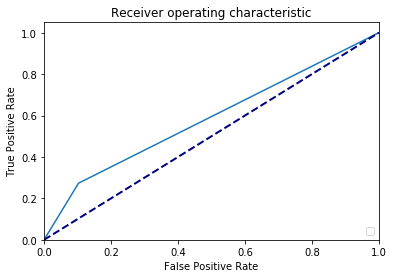

In [57]:
lw =2
plt.plot(fpr,tpr)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
